<a href="https://www.kaggle.com/code/cemkesici/usarrests-with-kmeans?scriptVersionId=140237750" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/usarrests/USArrests.csv", index_col=0)

In [3]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [7]:
sc=MinMaxScaler((0,1))
df=sc.fit_transform(df)
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [8]:
kmeans=KMeans(n_clusters=4, n_init="auto",random_state=17).fit(df)
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'auto',
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [9]:
kmeans.n_clusters
kmeans.cluster_centers_
kmeans.labels_
kmeans.inertia_

3.7175114023035523

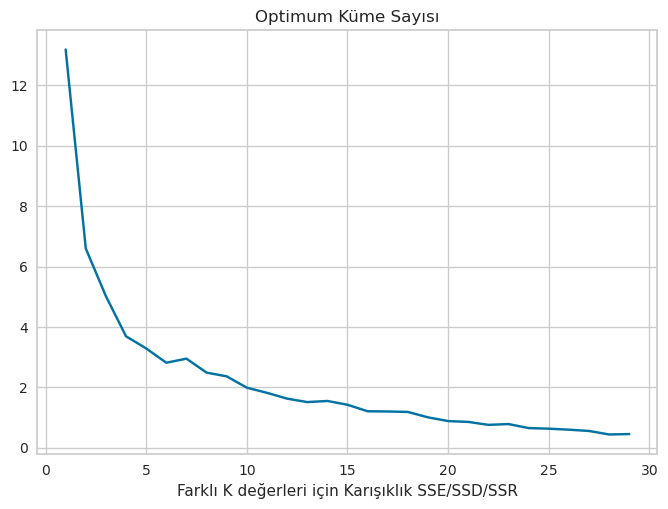

In [10]:
#En iyi n_clusters değerini bulmak için fonksiyon
ssd=[]
K= range(1,30)
for k in K:
    kmeans=KMeans(n_clusters=k,n_init="auto").fit(df)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K değerleri için Karışıklık SSE/SSD/SSR")
plt.title("Optimum Küme Sayısı")
plt.show()

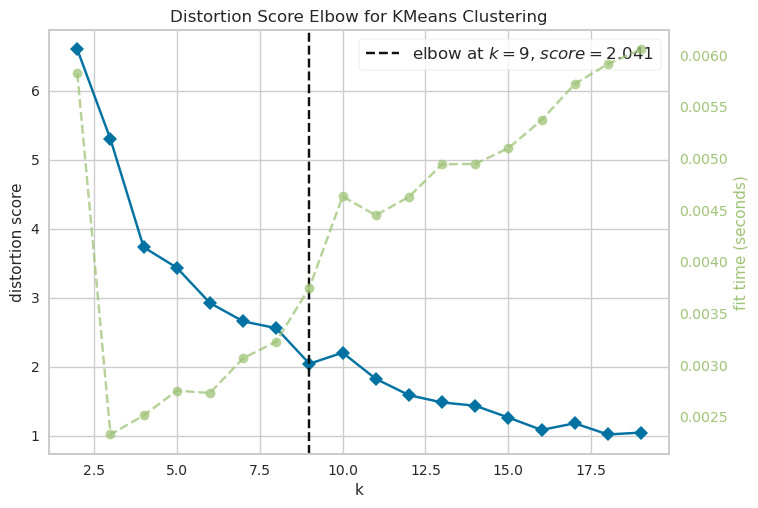

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
# KElbowVisualizer ile optimum küme sayısını bulmak
kmeans=KMeans(n_init="auto")
elbow=KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(df)
elbow.show()

In [12]:
# KElbowVisualizer ile optimum değeri kod ile almak için
elbow.elbow_value_

9

In [13]:
#Final Model
kmeans=KMeans(n_clusters = elbow.elbow_value_).fit(df)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
kmeans.n_clusters
kmeans.cluster_centers_
kmeans.labels_

array([5, 8, 6, 4, 2, 2, 1, 4, 0, 5, 1, 3, 6, 4, 3, 4, 4, 5, 3, 0, 1, 0,
       3, 5, 4, 4, 3, 2, 3, 1, 0, 6, 5, 7, 1, 4, 4, 1, 1, 5, 7, 5, 6, 1,
       7, 4, 1, 7, 3, 4], dtype=int32)

In [15]:
#Datasete tahmin edilen değerleri ekledim
clusters=kmeans.labels_
df=pd.read_csv("/kaggle/input/usarrests/USArrests.csv",index_col=0)
df["clusters"]=clusters+1

In [16]:
df.head()

,Murder,Assault,UrbanPop,Rape,clusters
Alabama,13.2,236,58,21.2,6
Alaska,10.0,263,48,44.5,9
Arizona,8.1,294,80,31.0,7
Arkansas,8.8,190,50,19.5,5
California,9.0,276,91,40.6,3


In [17]:
#clusterlara göre pilottable oluşturuyorum
df.groupby("clusters").agg(["mean","count","median"])

Murder                  Assault                UrbanPop        \
               mean count median        mean count median       mean count   
clusters                                                                     
1         12.550000     4  11.75  293.750000     4  292.5  72.750000     4   
2          4.955556     9   4.40  125.444444     9  120.0  80.111111     9   
3          9.700000     3   9.00  244.000000     3  252.0  83.333333     3   
4          2.657143     7   2.60   77.571429     7   72.0  58.857143     7   
5          7.218182    11   6.80  152.636364    11  156.0  62.363636    11   
6         14.671429     7  14.40  251.285714     7  249.0  54.285714     7   
7         10.575000     4  10.75  249.500000     4  251.5  82.250000     4   
8          3.125000     4   3.00   65.000000     4   64.5  40.000000     4   
9         10.000000     1  10.00  263.000000     1  263.0  48.000000     1   

                      Rape               
         median       mean count median  
clusters                                 
1          72.0  31.725000     4  32.00  
2          80.0  17.788889     9  18.80  
3          81.0  41.766667     3  40.60  
4          57.0  12.142857     7  11.30  
5          65.0  20.072727    11  19.50  
6          58.0  21.685714     7  22.20  
7          81.5  26.650000     4  25.80  
8          41.5  10.150000     4  10.25  
9          48.0  44.500000     1  44.50

In [18]:
#csv dosyası olarak kayot ediyoruz
#df.to_csv("clusters.csv")